<a href="https://colab.research.google.com/github/Rama389/AI-Projects/blob/main/Deep_Learning_Class_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

##Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

## Loading Dataset

In [ ]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

print("Shape of dataset:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head(20))

Shape of dataset: (7043, 21)
Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0   7590-VHVEG  Female              0     Yes         No       1           No   
1   5575-GNVDE    Male              0      No         No      34          Yes   
2   3668-QPYBK    Male              0      No         No       2          Yes   
3   7795-CFOCW    Male              0      No         No      45           No   
4   9237-HQITU  Female              0      No         No       2          Yes   
5   9305-CDSKC  Female              0      No         No       8          Yes   
6   1452-KIOVK    Male              0      No        Yes      22       

## EDA


Missing values:
 gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Class distribution:
 Churn
0    5174
1    1869
Name: count, dtype: int64


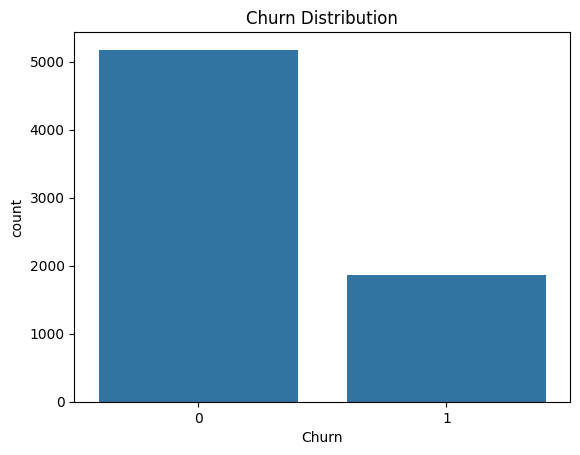

In [ ]:
print("\nMissing values:\n", df.isnull().sum())
print("\nClass distribution:\n", df['Churn'].value_counts())

# Plot churn distribution
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()

#Data Preprocessing(Encoding)

In [ ]:


# Convert TotalCharges to numeric (some values are blank)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

# Encode categorical variables
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

/tmp/ipython-input-2181679316.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
# Features and target
X = df.drop("Churn", axis=1).values
y = df["Churn"].values

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Model Architecture

In [ ]:
# 4. Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Convert to PyTorch tensors
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

train_ds = TensorDataset(X_train_t, y_train_t)
test_ds = TensorDataset(X_test_t, y_test_t)

train_dl = DataLoader(train_ds, batch_size=64, shuffle=True)
test_dl = DataLoader(test_ds, batch_size=64)

In [ ]:
# 5. Build Neural Network
# -----------------------------
class ChurnNN(nn.Module):
    def __init__(self, input_dim, hidden_layers, hidden_units, dropout):
        super(ChurnNN, self).__init__()
        layers = [nn.Linear(input_dim, hidden_units), nn.ReLU(), nn.Dropout(dropout)]
        for _ in range(hidden_layers - 1):
            layers.append(nn.Linear(hidden_units, hidden_units))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout))
        layers.append(nn.Linear(hidden_units, 1))
        layers.append(nn.Sigmoid())
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)

#Training and Evaluation


Model Performance:
Accuracy:  0.7601
Precision: 0.5552
Recall:    0.4840
F1 Score:  0.5171

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84      1035
           1       0.56      0.48      0.52       374

    accuracy                           0.76      1409
   macro avg       0.69      0.67      0.68      1409
weighted avg       0.75      0.76      0.75      1409



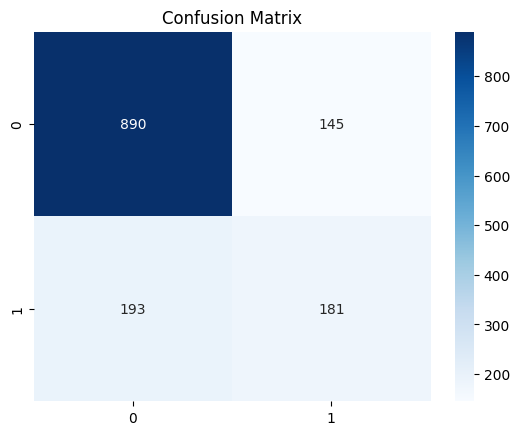

In [ ]:
# -----------------------------
# 6. Train Model
# -----------------------------
def train_and_evaluate(input_dim, hidden_layers, hidden_units, dropout=0.0, epochs=30, lr=0.001):
        model = ChurnNN(input_dim, hidden_layers, hidden_units, dropout)
        criterion = nn.BCELoss()
        optimizer = optim.Adam(model.parameters(), lr=lr)
        for epoch in range(epochs):
            model.train()
            for xb, yb in train_dl:
                optimizer.zero_grad()
                preds = model(xb)
                loss = criterion(preds, yb)
                loss.backward()
                optimizer.step()

            # if (epoch+1) % 10 == 0:
            #     print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

        # -----------------------------
        # 7. Evaluate Model
        # -----------------------------
        model.eval()
        with torch.no_grad():
            y_pred_probs = model(X_test_t).numpy()
            y_pred = (y_pred_probs >= 0.5).astype(int)

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        return {"layers": hidden_layers, "units": hidden_units, "dropout": dropout, "accuracy": acc, "precision": prec, "recall": rec, "f1": f1}
print("\nModel Performance:")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

#Hyperparameter Experiment

{'layers': 1, 'units': 32, 'dropout': 0.0, 'accuracy': 0.794889992902768, 'precision': 0.6411960132890365, 'recall': 0.516042780748663, 'f1': 0.5718518518518518}
{'layers': 1, 'units': 32, 'dropout': 0.3, 'accuracy': 0.7963094393186657, 'precision': 0.6474576271186441, 'recall': 0.5106951871657754, 'f1': 0.5710014947683109}
{'layers': 1, 'units': 64, 'dropout': 0.0, 'accuracy': 0.7955997161107168, 'precision': 0.634375, 'recall': 0.5427807486631016, 'f1': 0.5850144092219021}
{'layers': 1, 'units': 64, 'dropout': 0.3, 'accuracy': 0.7913413768630234, 'precision': 0.6351351351351351, 'recall': 0.5026737967914439, 'f1': 0.5611940298507463}
{'layers': 1, 'units': 128, 'dropout': 0.0, 'accuracy': 0.7892122072391767, 'precision': 0.6305084745762712, 'recall': 0.49732620320855614, 'f1': 0.5560538116591929}
{'layers': 1, 'units': 128, 'dropout': 0.3, 'accuracy': 0.7984386089425124, 'precision': 0.6530612244897959, 'recall': 0.5133689839572193, 'f1': 0.5748502994011976}
{'layers': 2, 'units': 32

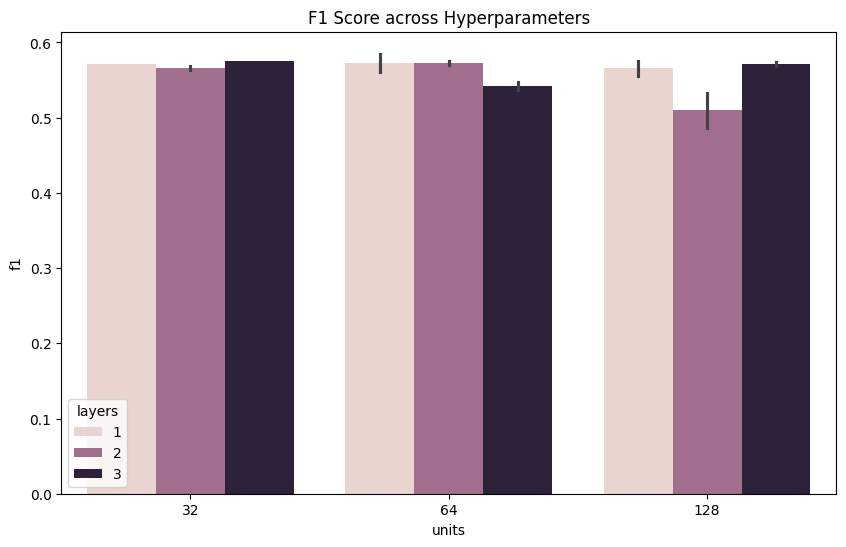

In [ ]:
# Hyperparameter Experiments
# -----------------------------
results = []

for hidden_layers in [1, 2, 3]:
    for hidden_units in [32, 64, 128]:
        for dropout in [0.0, 0.3]:
            res = train_and_evaluate(X_train.shape[1], hidden_layers, hidden_units, dropout)
            results.append(res)
            print(res)

# -----------------------------
# Results DataFrame
# -----------------------------
results_df = pd.DataFrame(results)
print("\nAll Results:\n", results_df)

# Best configuration
best_model = results_df.sort_values(by="f1", ascending=False).iloc[0]
print("\nBest Configuration:\n", best_model)

# Plot results
plt.figure(figsize=(10,6))
sns.barplot(data=results_df, x="units", y="f1", hue="layers")
plt.title("F1 Score across Hyperparameters")
plt.show()